# Music Genres Classification and Interpretation 

There are 10 genres in western music , our classification is based on it.We have used GT_ZAN datasets for training the model that we built.

In [1]:
# importing necessary libraries


import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn
import seaborn as sns

# audio library
import librosa
import librosa.display
import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

 # operating sytem libraries
import os


**Accuracy manual plot**

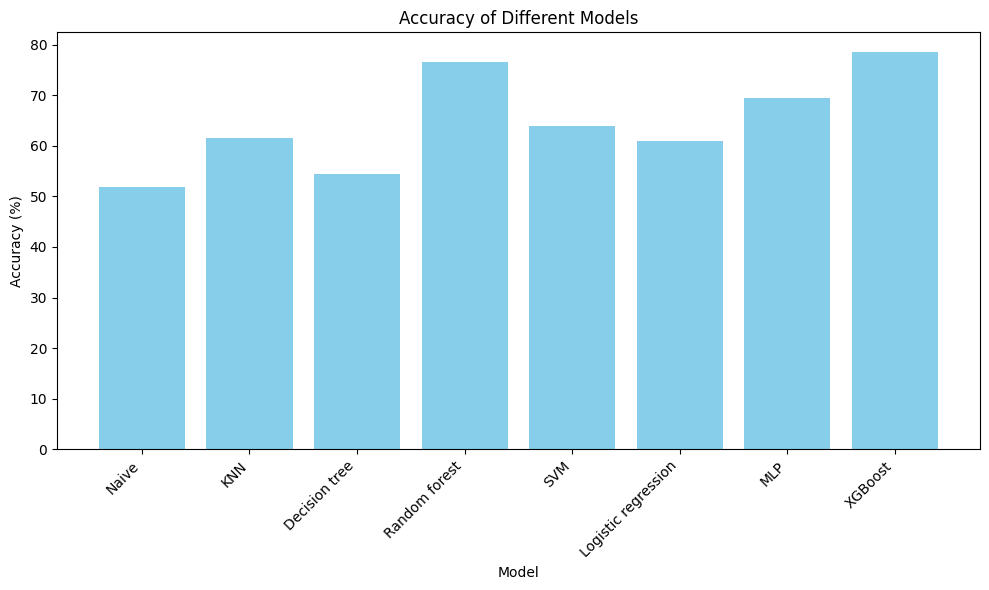

In [2]:

# List of models
models = ["Naive", "KNN", "Decision tree", "Random forest", "SVM", "Logistic regression", "MLP", "XGBoost"]

# Accuracy scores for each model
accuracy_scores = [51.9, 61.5, 54.5, 76.5, 64, 61, 69.5, 78.5]

# Plotting the bar graph
plt.figure(figsize=(10, 6))
plt.bar(models, accuracy_scores, color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy of Different Models')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.savefig("xxxx.jpg")
plt.show()


## Operating system library helps to traverse along different directory of the files when required during processing.

In [3]:
audio_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data"

# listing the directory in the audio_path path 

print(list(os.listdir(f'{audio_path}/genres_original/')))

['disco', 'metal', 'reggae', 'blues', 'rock', 'classical', 'jazz', 'hiphop', 'country', 'pop']


### Taking metal music to proceed the algorithm.

Datasets GTZAN contains 10 differents genres, among them we pick metal for processing .Others can be  choosen in similar way.

The load method of the librosa load audio files and converts it into digital signal after sampling analog signal(analog signal is obtained from simple encoding and decoding technique)

In [4]:
metal_audio, sr = librosa.load(f'{audio_path}/genres_original/metal/metal.00036.wav')# audio loading,default sample rate is used.


In [5]:
ipd.Audio(f'{audio_path}/genres_original/metal/metal.00036.wav')
#listen to the audio sound used for classification.

In [6]:
# the silence at the beginnig and ending can be eliminated mathematically by trim.
metal_audio, _ =  librosa.effects.trim(metal_audio)

In [7]:
# general  information of the metal audio  
print(f"shape of the audio signal : {metal_audio.shape}")
print(f"sampling frequency(rate) is : {sr} KHz")
print(f"Duration of the audio : {librosa.get_duration(y = metal_audio)} seconds")

shape of the audio signal : (661504,)
sampling frequency(rate) is : 22050 KHz
Duration of the audio : 30.00018140589569 seconds


In [8]:
# now see the audio file
print(f" the audio data is : {metal_audio}")
print(f"the shape is {np.shape(metal_audio)}") # entire data sampled are collected as single row(column matrix)

 the audio data is : [ 0.034729    0.07818604  0.0899353  ... -0.17190552 -0.19494629
 -0.19726562]
the shape is (661504,)


Text(0.5, 1.0, 'Sound Waves in metal 36')

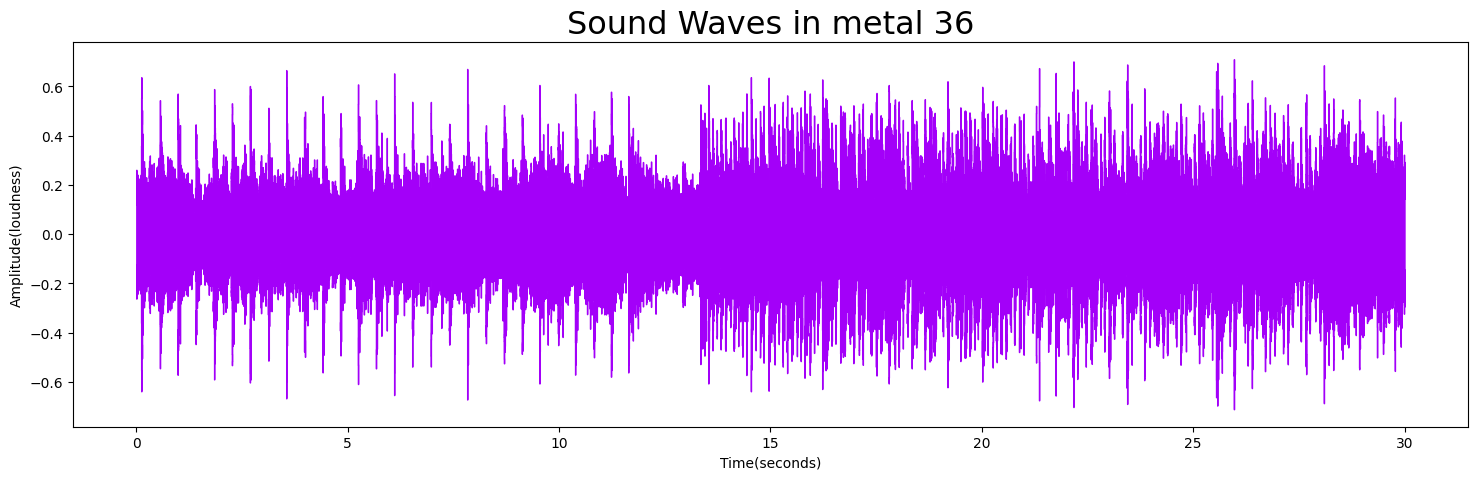

In [9]:
#2D representation of the audio file

plt.figure(figsize = (18, 5))
librosa.display.waveshow(y = metal_audio, sr = sr, color = "#A300F9");
plt.xlabel("Time(seconds)") 
plt.ylabel("Amplitude(loudness)")
plt.title("Sound Waves in metal 36", fontsize = 23)


### PCM(Pulse Coded Modulation)

PCM refers to a digital representation of an analog audio signal. In PCM format, an analog audio signal is sampled at regular intervals, and each sample is quantized to a specific bit depth. This process converts the continuous analog signal into a discrete digital signal, which can be easily stored, transmitted, and processed by computers and other digital devices.

The figure above represent the pulse coded modulation of the audio signal "metal00036.wav".It is necessary to convert any signal to digital format before any manipulation.

## Fourier Transform 

The above wave is the time representation of the signal , various algorithm require frequency terms of the audio. so we convert this to frequency terms.

In [10]:
# In terms of the frequency the above signal is illustrated as;

# Default FFT window size
n_fft = 2048 # FFT(fast fourier transform) window size or frame size = 2048 samples
hop_length = 512 # number of audio frames between STFT columns (looks like a good default) 512 samples in one hop

# number of frames = hop_length = 1292

# Short-time Fourier transform (STFT)
metal_stft = librosa.stft(metal_audio, n_fft = n_fft, hop_length = hop_length)
absolute_metal = np.abs(metal_stft) #  holds all the absolute value of the signal obtained using stft

print('Shape of absolute_metal object:', np.shape(absolute_metal))  
print(f'the aboslute value of all the smaples are {absolute_metal}')

Shape of absolute_metal object: (1025, 1293)
the aboslute value of all the smaples are [[9.2813510e-01 9.3747801e-01 3.7667912e-01 ... 3.0413407e-01
  6.3159478e-01 8.6935616e-01]
 [8.8424933e-01 5.1593328e-01 2.5557095e-01 ... 2.4447317e-01
  5.6945527e-01 8.7052065e-01]
 [8.3113164e-01 3.3273095e-01 2.2118382e-01 ... 2.0741315e-01
  8.3948380e-01 7.9144633e-01]
 ...
 [9.1251051e-03 4.5618750e-03 2.7970839e-04 ... 1.8810653e-04
  4.8906848e-02 9.7609401e-02]
 [9.0699913e-03 4.2382609e-03 4.6082595e-04 ... 1.4603410e-04
  4.8812788e-02 9.7563826e-02]
 [9.1439048e-03 4.8471740e-03 3.9860507e-04 ... 7.6419878e-05
  4.8874930e-02 9.7557895e-02]]


#### here 1293 is the frames obtain from short fourier transform.this frames acts as column so there are 1293 column and 1025 rows that is frequency bins.The dimension obtained after fourier transform is (frequency bins, frames). the number of the frequency bins for STFT would be equal to the frame size normally, but due to symmetric mirror value we take frequency bins of half the samples in a frame that is  2048/2 + 1  , 

The first example of the above 2D represents the first sample value(coeffiecients) of all the frames similarly second example represents the second sample value from all the frames(1293) and so on.

when we iterate over all the example values we complete the data read upto 30 seconds. separately observed in different frames.


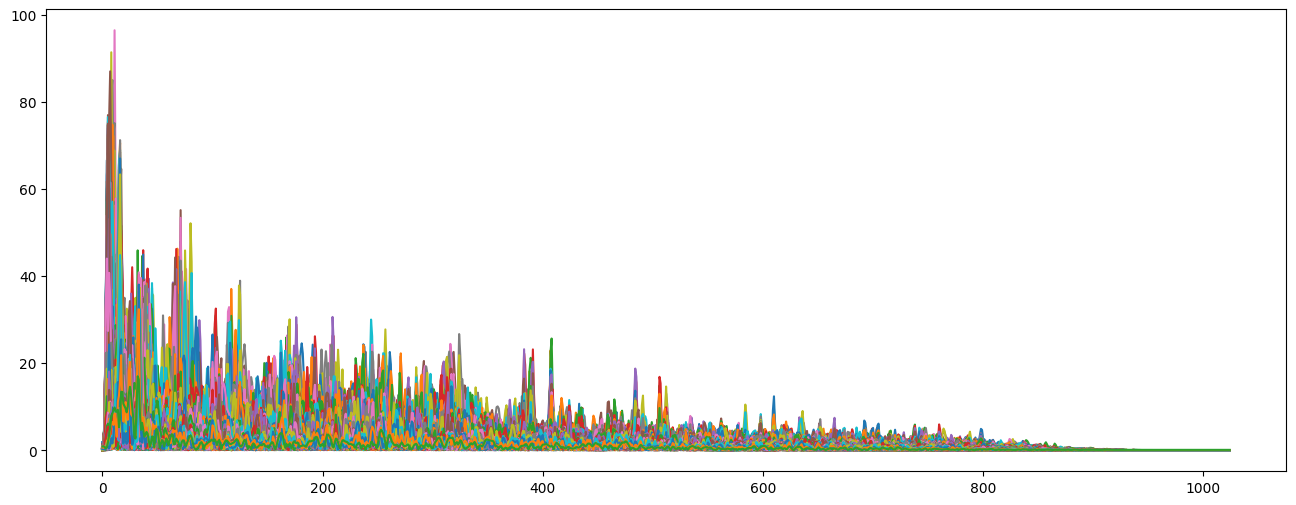

In [11]:
plt.figure(figsize = (16, 6))
plt.plot(absolute_metal);

### Spectrogram and Mel Spectrogram

The Mel scale is a perceptual scale of pitches that approximates the human ear's response to different frequencies. It was designed to better reflect the way humans perceive and differentiate between different frequencies, especially in the context of speech and audio signals.
Any frequency f can be converted to the mel frequency as:

Mel(f) = 2595 * log10(1 + f / 700)

And the corresponding frequency from mel frequency is obtained as:

f = 700 * (10^(Mel(f) / 2595) - 1)

The shape of the metal decibel (1025, 1293)


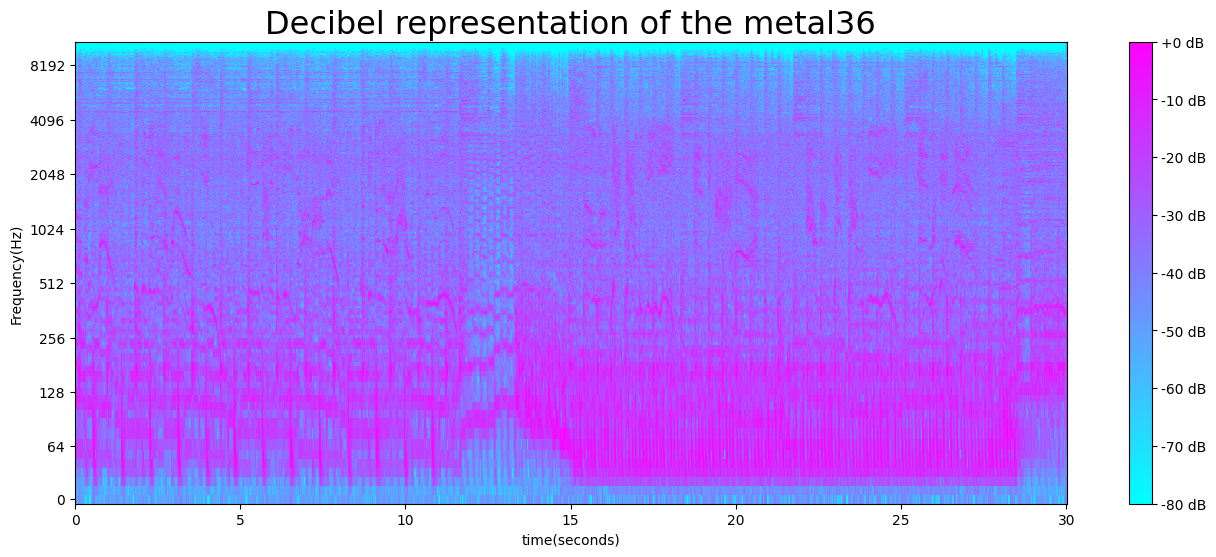

In [12]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
metal_dB = librosa.amplitude_to_db(absolute_metal, ref = np.max) # decibel representation of the audio
print(f"The shape of the metal decibel {np.shape(metal_dB)}")

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(metal_dB, sr = sr, hop_length = hop_length, x_axis = 'time', y_axis = 'log',cmap = 'cool')
plt.title('Decibel representation of the metal36',fontsize = 23)
plt.xlabel('time(seconds)')
plt.ylabel("Frequency(Hz)")
plt.colorbar(format = "%+2.f dB");
# The color bar represents the decibels of the metal sound.The negative decibel means that the sound is softer than the 
#threshold of hearing. example if threshold of  hearing is 20dB and th decibel level is 15 it means it, is negative 5.
# The decibel is 0 means it match with threshold of hearing.

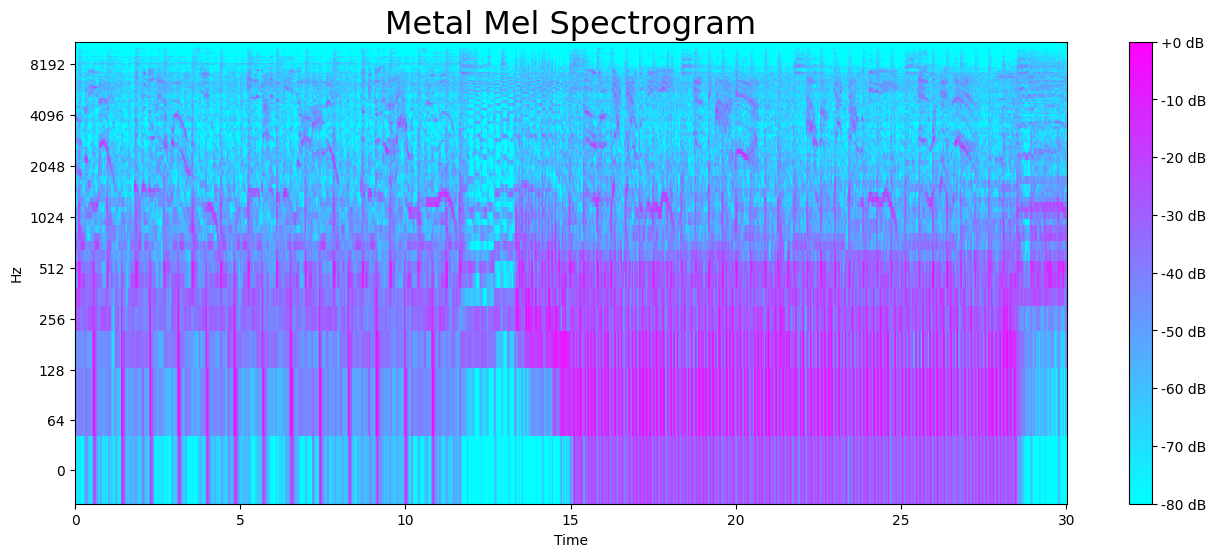

In [13]:
# let's see the melspectrogram of the audio 

metal, sr = librosa.load(f'{audio_path}/genres_original/metal/metal.00036.wav')
metal, _ = librosa.effects.trim(metal)


metal_mels = librosa.feature.melspectrogram(y=metal, sr=sr)# this metal_mels represent the mel frequency of the original sound files.

# We need more plot at this stage

S_DB = librosa.amplitude_to_db(metal_mels, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar(format = "%+2.f dB");
plt.title("Metal Mel Spectrogram", fontsize = 23);

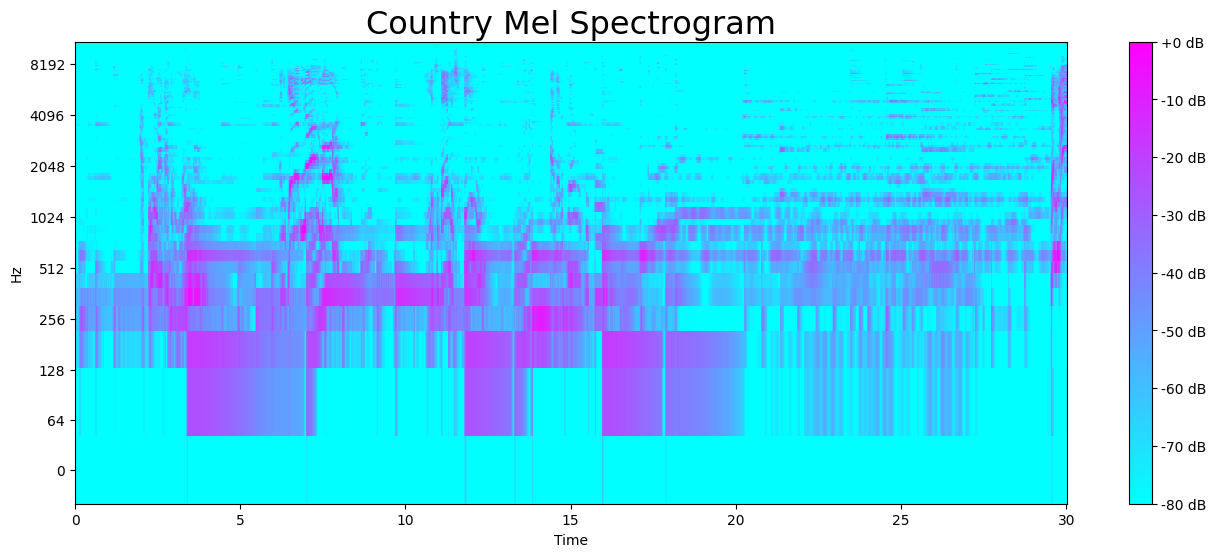

In [14]:
# check another file melspectrogram
y, sr = librosa.load(f'{audio_path}/genres_original/country/country.00036.wav')
y, _ = librosa.effects.trim(y)


S = librosa.feature.melspectrogram(y=y, sr=sr)
S_DB = librosa.amplitude_to_db(S, ref=np.max)
plt.figure(figsize = (16, 6))
librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis = 'time', y_axis = 'log',
                        cmap = 'cool');
plt.colorbar(format = "%+2.f dB");
plt.title("Country Mel Spectrogram", fontsize = 23);

we see the difference of the melspetrogram picture for different audio of different genres

In [15]:
mfccs = librosa.feature.mfcc(y=metal, sr=sr)
print('mfccs shape:', mfccs.shape)
print(' mean before :',mfccs.mean(), '\n')
print('Var before :', mfccs.var())
dir(librosa.feature)

mfccs shape: (20, 1293)
 mean before : 2.80447 

Var before : 1053.4927


['chroma_cens',
 'chroma_cqt',
 'chroma_stft',
 'chroma_vqt',
 'delta',
 'fourier_tempogram',
 'inverse',
 'melspectrogram',
 'mfcc',
 'poly_features',
 'rms',
 'spectral_bandwidth',
 'spectral_centroid',
 'spectral_contrast',
 'spectral_flatness',
 'spectral_rolloff',
 'stack_memory',
 'tempo',
 'tempogram',
 'tempogram_ratio',
 'tonnetz',
 'zero_crossing_rate']

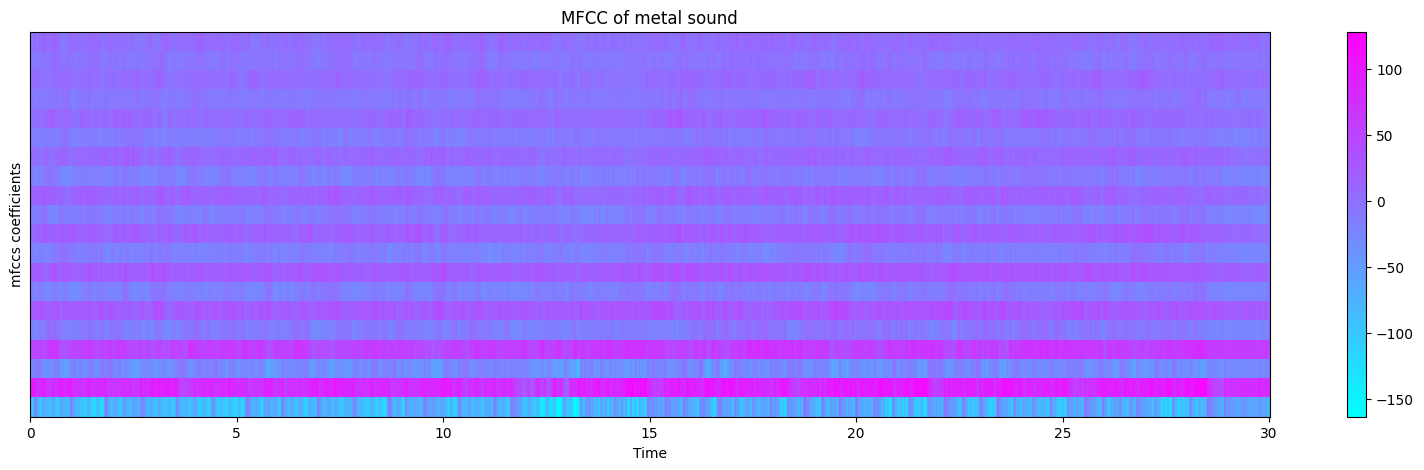

In [16]:
#Displaying  the MFCCs:

plt.figure(figsize = (20, 5))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');
plt.title('MFCC of metal sound')
plt.ylabel('mfccs coefficients')
plt.colorbar()
plt.show()

### whats above?
  
   The figure above represents the mfccs of the audio , here we have taken 20 mfccs coeffiecients , there are several coeffiecients which are not important so far. now we can tune this coeffiecients later.

In [17]:
# Perform Feature Scaling
#before scaling

mfccs = sklearn.preprocessing.scale(mfccs, axis=1)
print('Mean after scaling:', mfccs.mean(), '\n')
print('Var after scaling :', mfccs.var())


Mean after scaling: -2.9502686e-10 

Var after scaling : 1.0


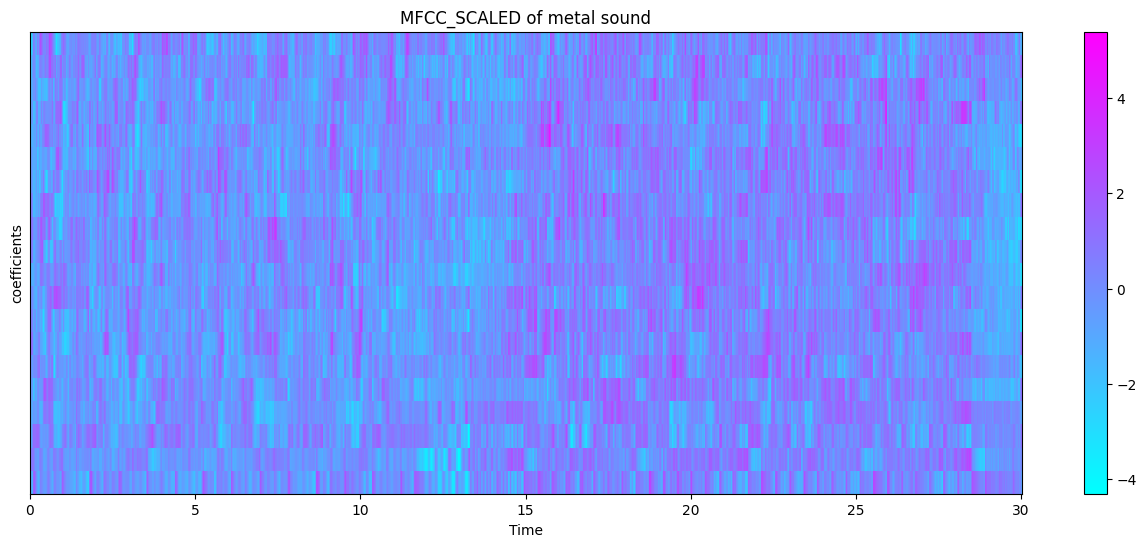

In [18]:
# Displaying mfccs after scaling 

plt.figure(figsize = (16, 6))
librosa.display.specshow(mfccs, sr=sr, x_axis='time', cmap = 'cool');
plt.title('MFCC_SCALED of metal sound')
plt.ylabel('coefficients')
plt.colorbar()
plt.show()

In [19]:
# chroma feature 

# Audio features

### Chroma features

Chroma features, in the context of music and audio signal processing, are a representation of the distribution of energy in the musical pitch classes.There are 12 pitch classes in the western music.

Chromogram shape: (12, 133)


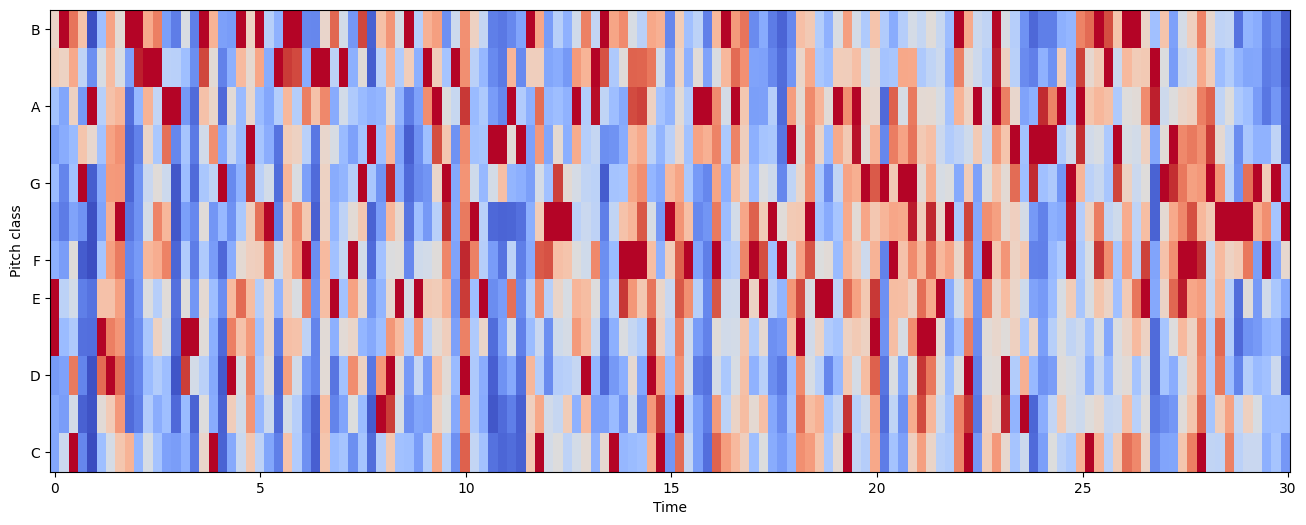

In [20]:
# Increase or decrease hop_length to change how granular you want your data to be
hop_length = 5000

# Chromogram
chromagram = librosa.feature.chroma_stft(y=metal, sr=sr, hop_length=hop_length)
print('Chromogram shape:', chromagram.shape)

plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=hop_length, cmap='coolwarm');

## Spectral Centroid

The spectral centroid is a measure used in signal processing and music analysis to describe the center of mass of a sound spectrum. In simpler terms, it provides information about the "average" frequency content or the balance of frequencies in a given audio signal.

In [21]:
# Calculate the Spectral Centroids
spectral_centroids = librosa.feature.spectral_centroid(y=metal, sr=sr)[0]

# Shape is a vector
print('Centroids:', spectral_centroids, '\n')
print('Shape of Spectral Centroids:', spectral_centroids.shape, '\n')

# Computing the time variable for visualization
frames = range(len(spectral_centroids))

# Converts frame counts to time (seconds)
t = librosa.frames_to_time(frames)

print('frames:', frames, '\n')
print('t:', t)

# Function that normalizes the Sound Data
def normalize(x, axis=0):
    return sklearn.preprocessing.minmax_scale(x, axis=axis)

Centroids: [2458.75657873 2497.52121602 2442.5509736  ... 2851.67884102 2546.71925761
 2486.96342315] 

Shape of Spectral Centroids: (1293,) 

frames: range(0, 1293) 

t: [0.00000000e+00 2.32199546e-02 4.64399093e-02 ... 2.99537415e+01
 2.99769615e+01 3.00001814e+01]


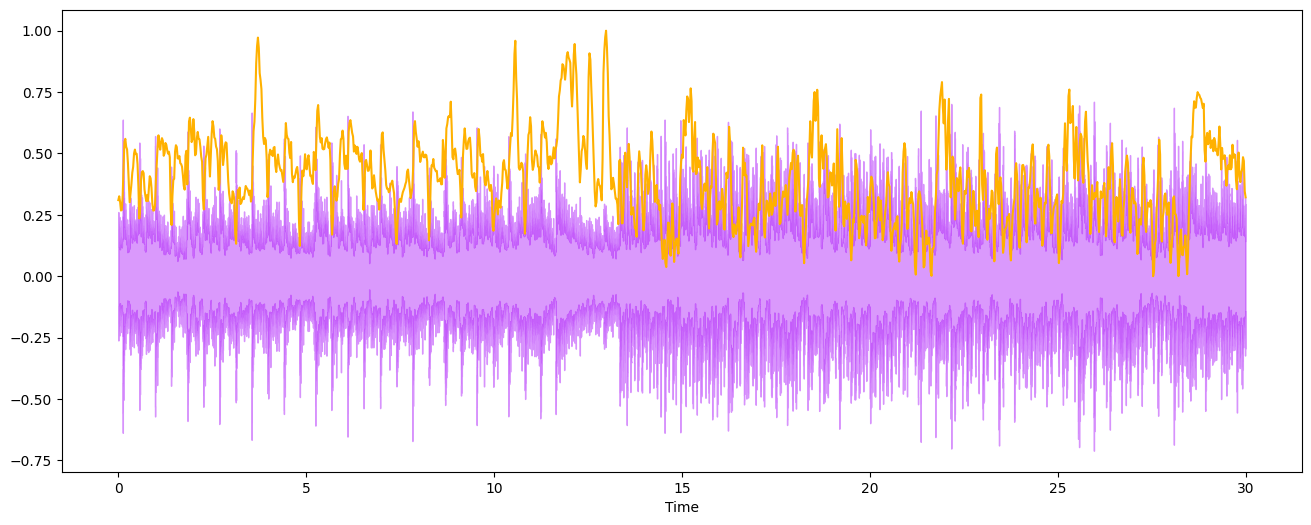

In [22]:
#Plotting the Spectral Centroid along the waveform
plt.figure(figsize = (16, 6))
librosa.display.waveshow(metal, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_centroids), color='#FFB100');

### Spectral Rollof

The spectral roll-off is a measure that indicates the frequency below which a certain percentage of the total spectral energy is contained.
Higher the spectral rollof means the high energy of the music is contained in the lower frequency range.

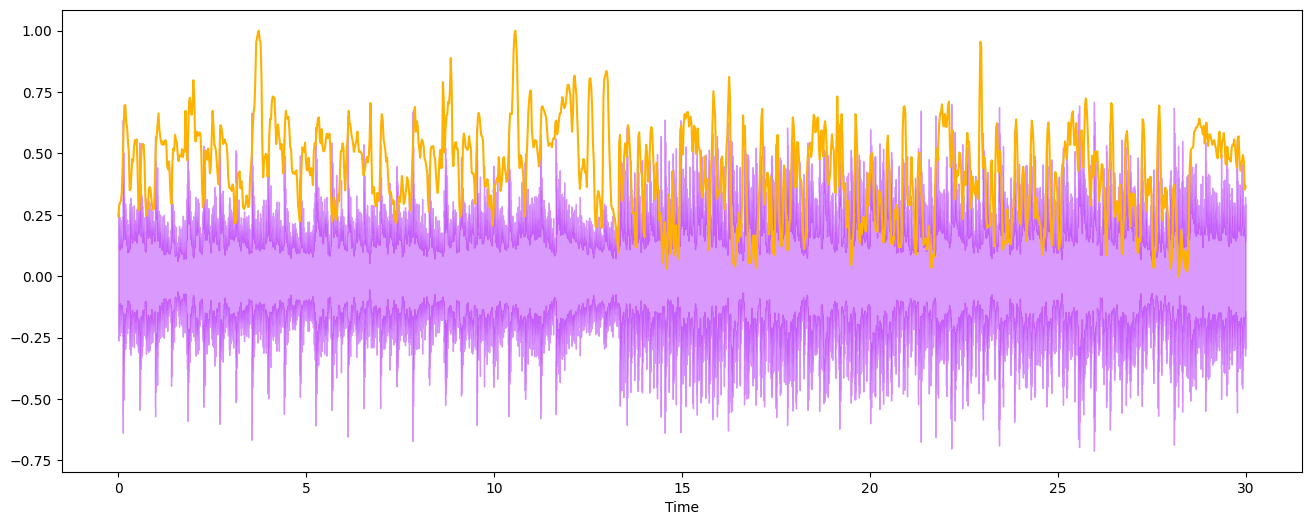

In [23]:
# Spectral RollOff Vector
spectral_rolloff = librosa.feature.spectral_rolloff(y= metal, sr=sr)[0]

# The plot
plt.figure(figsize = (16, 6))
librosa.display.waveshow(metal, sr=sr, alpha=0.4, color = '#A300F9');
plt.plot(t, normalize(spectral_rolloff), color='#FFB100');

## EDA


In [24]:
data = pd.read_csv(f'{audio_path}/features_30_sec.csv')
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  ...  mfcc16_var  \
0              2002.449060            85882.761315  ...   52.420910   
1              2039.036516           213843.755497  ...   55.356403   
2              1747.702312            76254.192257  ...   40.598766   
3              1596.412872           166441.494769  ...   44.427753   
4              1748.172116            88445.209036  ...   86.099236   

   mfcc17_mean  mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  \
0    -1.690215   36.524071    -0.408979   41.597103    -2.303523   55.062923   
1    -0.731125   60.314529     0.295073   48.120598    -0.283518   51.106190   
2    -7.729093   47.639427    -1.816407   52.382141    -3.439720   46.639660   
3    -3.319597   50.206673     0.636965   37.319130    -0.619121   37.259739   
4    -5.454034   75.269707    -0.916874   53.613918    -4.404827   62.910812   

   mfcc20_mean  mfcc20_var  label  
0     1.221291   46.936035  blues  
1     0.531217   45.786282  blues  
2    -2.231258   30.573025  blues  
3    -3.407448   31.949339  blues  
4   -11.703234   55.195160  blues  

[5 rows x 60 columns]

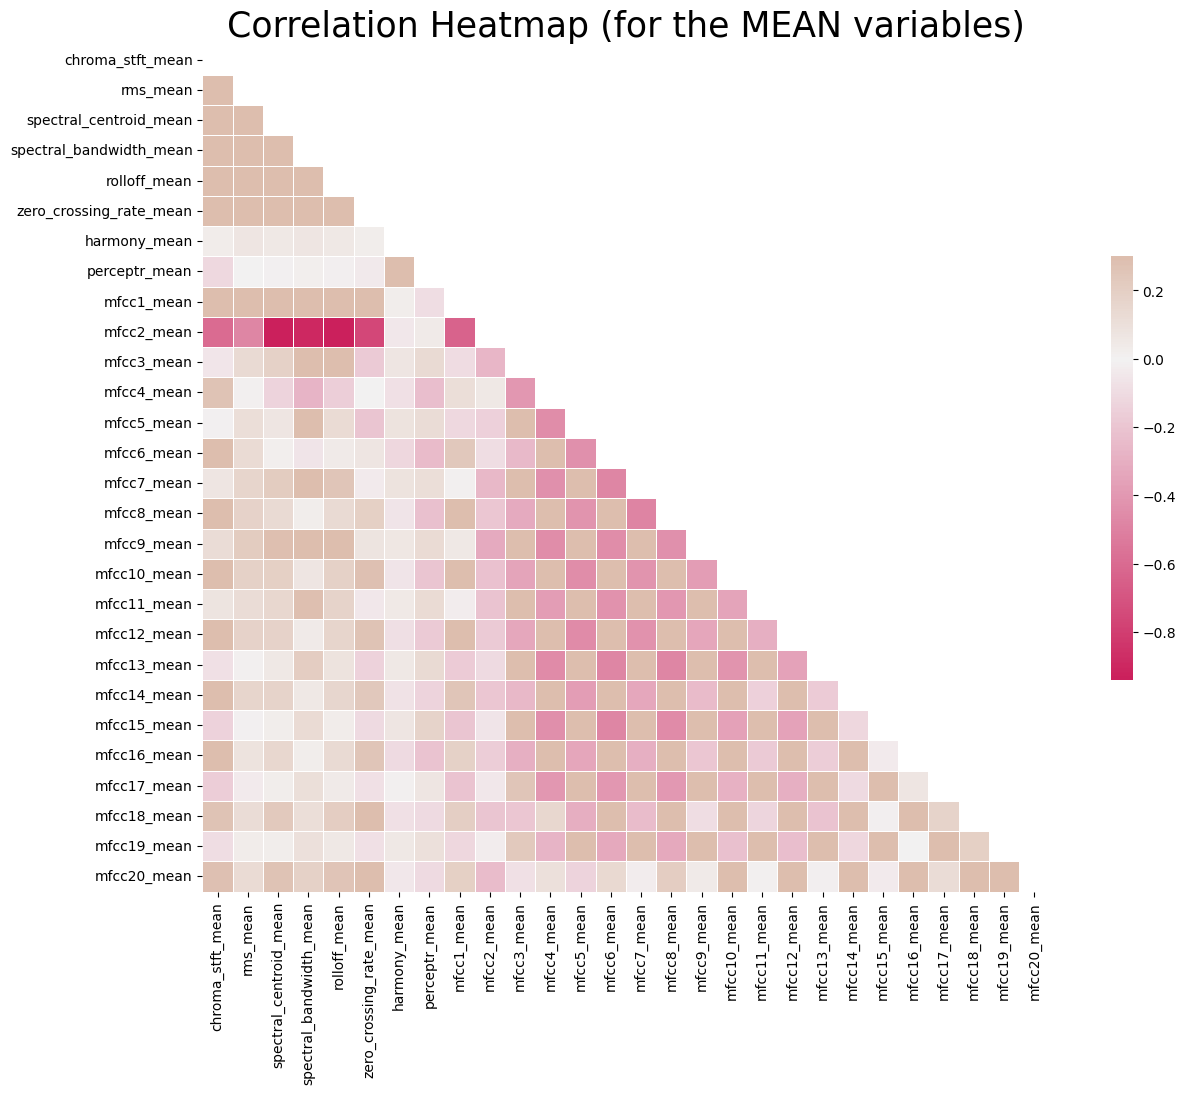

In [25]:
# Computing the Correlation Matrix
spike_cols = [col for col in data.columns if 'mean' in col]
corr = data[spike_cols].corr() #corr() gives the correlation between every music clips.

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(16, 11));

# Generate a custom diverging colormap
cmap = sns.diverging_palette(0, 25, as_cmap=True, s = 90, l = 45, n = 5)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title('Correlation Heatmap (for the MEAN variables)', fontsize = 25)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.savefig("Corr Heatmap.jpg")

### the heatmap above represents the correlation betweeb mean of different features. The color pallete is defined , and each color represents the similarity strength of the features. 

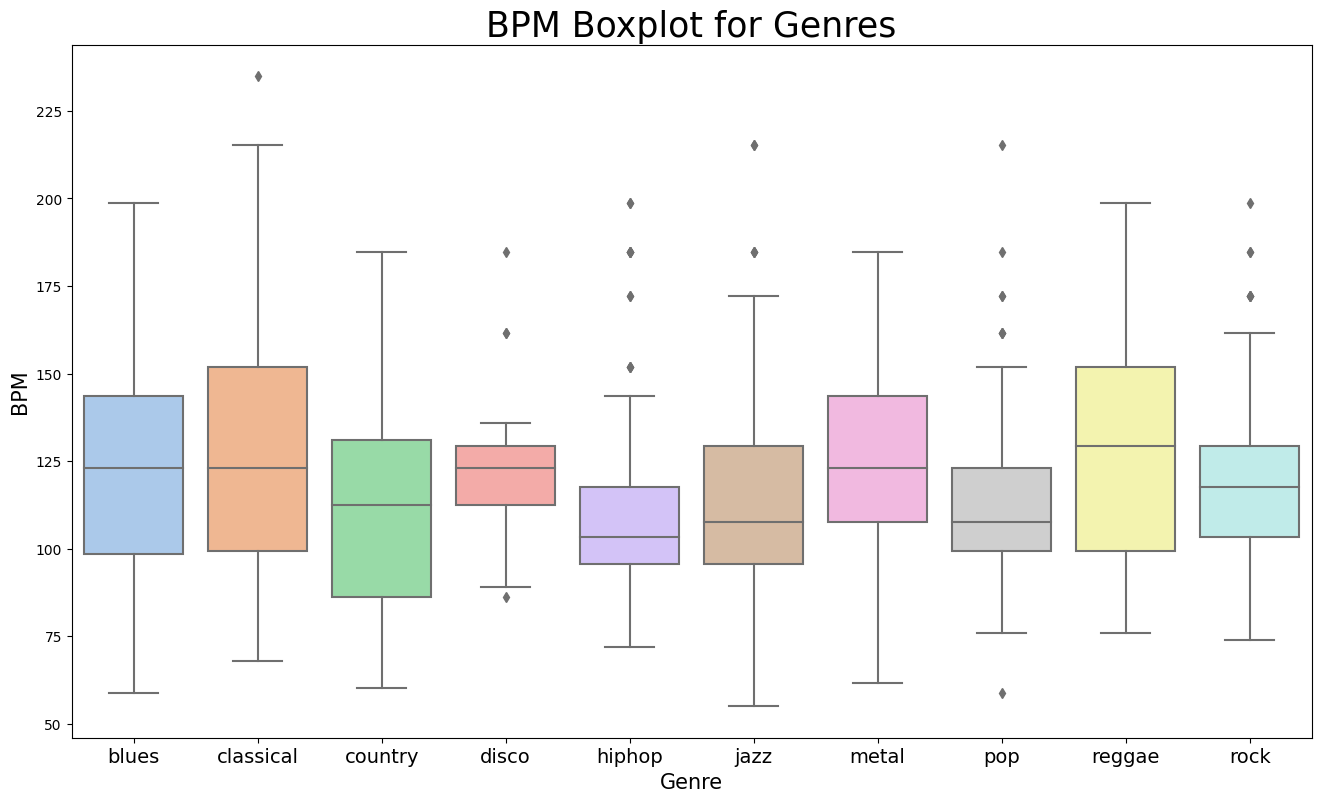

In [26]:
x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'pastel');

plt.title('BPM Boxplot for Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 15)
plt.ylabel("BPM", fontsize = 15)
plt.savefig("BPM Boxplot.jpg")

In [27]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.loc[:, data.columns != 'label']

#### NORMALIZE X ####
cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)


#### PCA 2 COMPONENTS ####
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

# concatenate with target label
finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

# 44.93 variance explained

array([0.2439355 , 0.21781804])

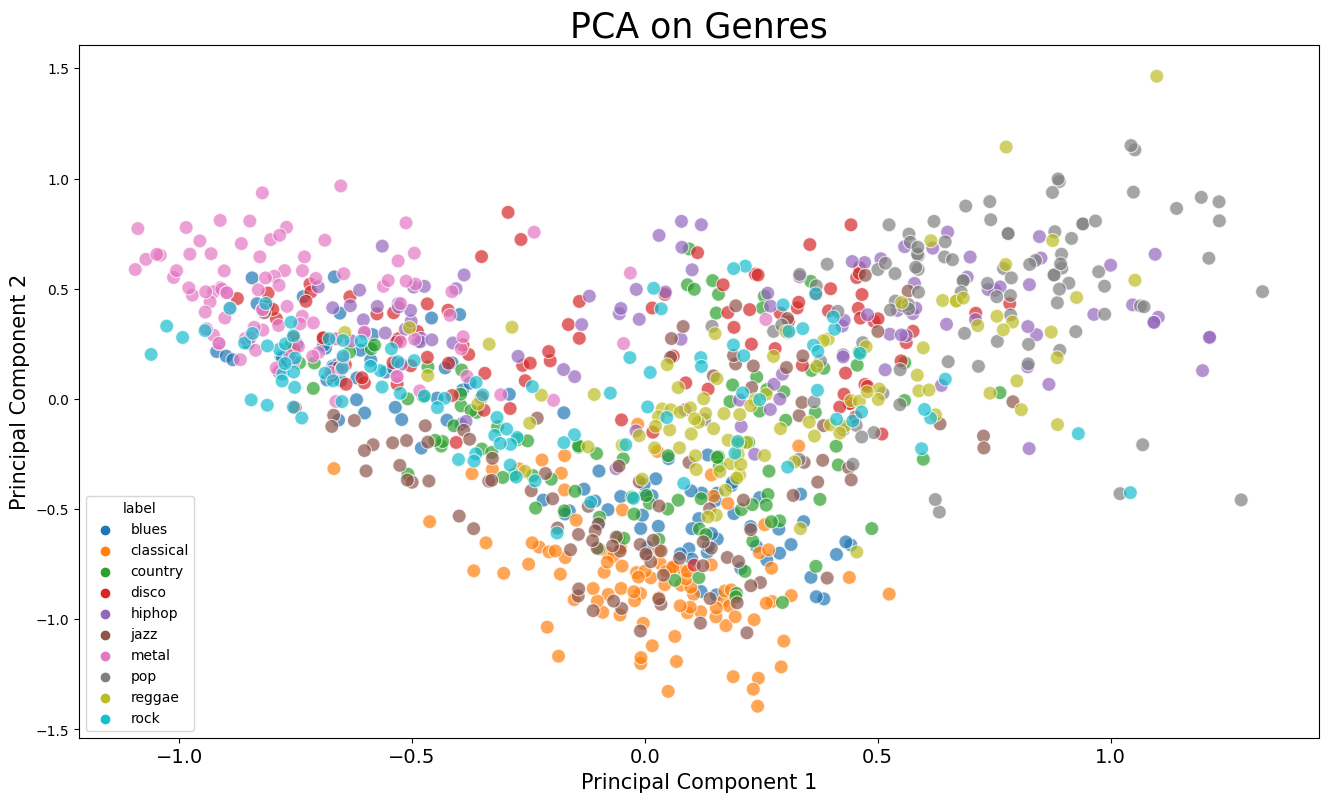

In [28]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 25)
plt.xticks(fontsize = 14)
plt.yticks(fontsize = 10);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

# Machine Learning

Using features_3_sec.csv file, we can try to build classifier, that accurately predict new audio file

## Libraries for machine learning.

In [29]:
import sys

In [30]:
!{sys.executable} -m pip install xgboost

In [31]:
import xgboost

In [32]:
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import SGDClassifier, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier, XGBRFClassifier
from xgboost import plot_tree, plot_importance

from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE

## Reading the data

In [33]:
data = pd.read_csv(f'{audio_path}/features_3_sec.csv')
data = data.iloc[0:, 1:] 
data.head()

length  chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0   66149          0.335406         0.091048  0.130405  0.003521   
1   66149          0.343065         0.086147  0.112699  0.001450   
2   66149          0.346815         0.092243  0.132003  0.004620   
3   66149          0.363639         0.086856  0.132565  0.002448   
4   66149          0.335579         0.088129  0.143289  0.001701   

   spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0             1773.065032          167541.630869              1972.744388   
1             1816.693777           90525.690866              2010.051501   
2             1788.539719          111407.437613              2084.565132   
3             1655.289045          111952.284517              1960.039988   
4             1630.656199           79667.267654              1948.503884   

   spectral_bandwidth_var  rolloff_mean  ...  mfcc16_var  mfcc17_mean  \
0           117335.771563   3714.560359  ...   39.687145    -3.241280   
1            65671.875673   3869.682242  ...   64.748276    -6.055294   
2            75124.921716   3997.639160  ...   67.336563    -1.768610   
3            82913.639269   3568.300218  ...   47.739452    -3.841155   
4            60204.020268   3469.992864  ...   30.336359     0.664582   

   mfcc17_var  mfcc18_mean  mfcc18_var  mfcc19_mean  mfcc19_var  mfcc20_mean  \
0   36.488243     0.722209   38.099152    -5.050335   33.618073    -0.243027   
1   40.677654     0.159015   51.264091    -2.837699   97.030830     5.784063   
2   28.348579     2.378768   45.717648    -1.938424   53.050835     2.517375   
3   28.337118     1.218588   34.770935    -3.580352   50.836224     3.630866   
4   45.880913     1.689446   51.363583    -3.392489   26.738789     0.536961   

   mfcc20_var  label  
0   43.771767  blues  
1   59.943081  blues  
2   33.105122  blues  
3   32.023678  blues  
4   29.146694  blues  

[5 rows x 59 columns]

In [34]:
y = data['label'] # genre variable.
X = data.loc[:, data.columns != 'label'] #select all columns except label column

#### NORMALIZE X ####

# Normalize so everything is on the same scale. 

cols = X.columns # extract all column title from the dataframe
min_max_scaler = preprocessing.MinMaxScaler() # using  minmax scaler as normalization methods.
np_scaled = min_max_scaler.fit_transform(X)
# new data frame with the new scaled data. 
X = pd.DataFrame(np_scaled, columns = cols)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [36]:
X_train.shape

(6993, 58)

In [37]:
# to claculate accuracy of the different classifier , we use this function
def model_assess(model, title = "Default"):
    if title == 'Cross Gradient Booster' or 'Cross Gradient Booster (Random Forest)':
        label_encoder = preprocessing.LabelEncoder()
        numeric_labels = label_encoder.fit_transform(y)
        train_level = label_encoder.fit_transform(y_train)
        model.fit(X_train,train_level)
        preds = model.predict(X_test)
        predicted_labels = label_encoder.inverse_transform(preds)
        print('Accuracy', title, ':', round(accuracy_score(y_test, predicted_labels), 5), '\n')
    else:
        model.fit(X_train, y_train)
        preds = model.predict(X_test)
        #print(confusion_matrix(y_test, preds))
        print('Accuracy', title, ':', round(accuracy_score(y_test, preds), 5), '\n')


## Classifiers

In [38]:
# Naive Bayes
nb = GaussianNB()
model_assess(nb, "Naive Bayes")

# Stochastic Gradient Descent
sgd = SGDClassifier(max_iter=5000, random_state=0)
model_assess(sgd, "Stochastic Gradient Descent")

# KNN
knn = KNeighborsClassifier(n_neighbors=19)
model_assess(knn, "KNN")

# Decission trees
tree = DecisionTreeClassifier()
model_assess(tree, "Decission trees")

# Random Forest
rforest = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=0)
model_assess(rforest, "Random Forest")

# Support Vector Machine
svm = SVC(decision_function_shape="ovo")
model_assess(svm, "Support Vector Machine")

# Logistic Regression
lg = LogisticRegression(random_state=0, solver='lbfgs', multi_class='multinomial')
model_assess(lg, "Logistic Regression")

# Neural Nets
nn = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5000, 10), random_state=1)
model_assess(nn, "Neural Nets")

# Cross Gradient Booster
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
model_assess(xgb, "Cross Gradient Booster")

# Cross Gradient Booster (Random Forest)
xgbrf = XGBRFClassifier(objective= 'multi:softmax')
model_assess(xgbrf, "Cross Gradient Booster (Random Forest)")

Accuracy Naive Bayes : 0.51952 

Accuracy Stochastic Gradient Descent : 0.65532 

Accuracy KNN : 0.80581 

Accuracy Decission trees : 0.63697 

Accuracy Random Forest : 0.81415 

Accuracy Support Vector Machine : 0.75409 

Accuracy Logistic Regression : 0.6977 

Accuracy Neural Nets : 0.67067 

Accuracy Cross Gradient Booster : 0.9009 

Accuracy Cross Gradient Booster (Random Forest) : 0.74708 



#### The above  classificcation is based on the audio features of the music. Among them the XGBClassifier have higher accuracy .

So , we take XGBClassifier as prime classifier in this scenario.

Accuracy : 0.9009 



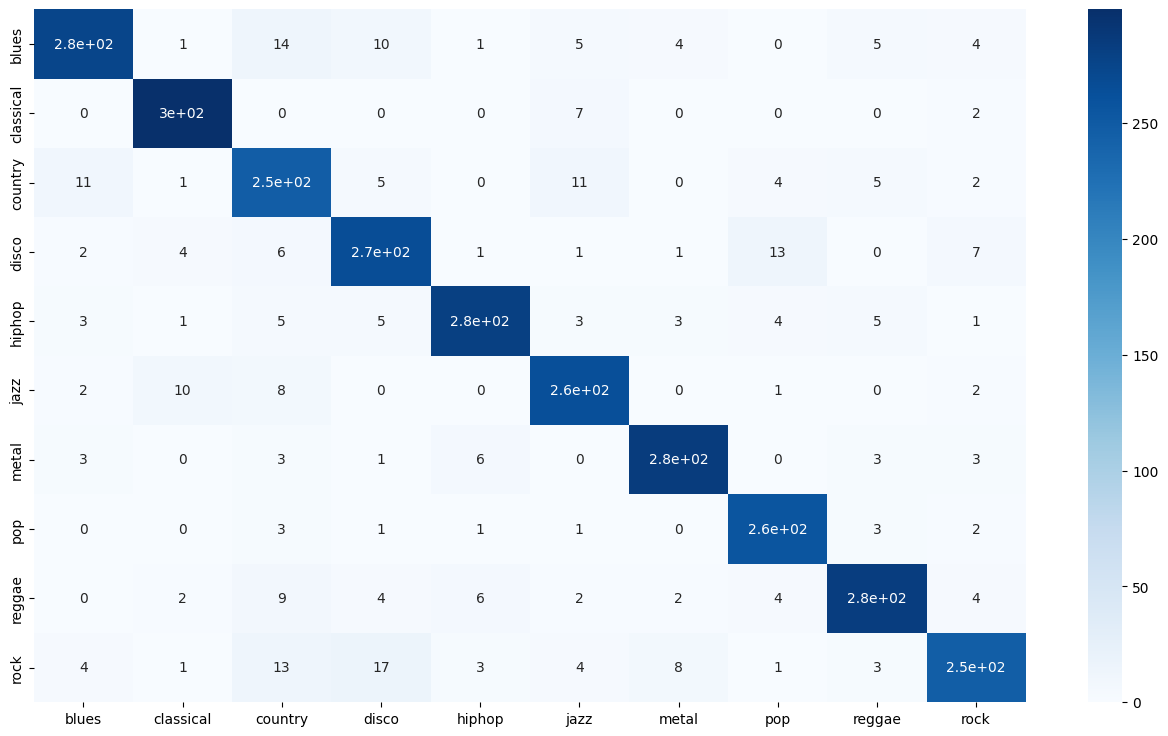

In [39]:
# Final model
xgb = XGBClassifier(n_estimators=1000, learning_rate=0.05)
label_encoder = preprocessing.LabelEncoder()
numeric_test_labels = label_encoder.fit_transform(y)
numeric_train_level = label_encoder.fit_transform(y_train)
xgb.fit(X_train,numeric_train_level)
numerical_preds = xgb.predict(X_test)
predicted_labels = label_encoder.inverse_transform(numerical_preds)
print('Accuracy', ':', round(accuracy_score(y_test, predicted_labels), 5), '\n')

# Confusion Matrix
confusion_matr = confusion_matrix(y_test, predicted_labels) #normalize = 'true'
plt.figure(figsize = (16, 9))
sns.heatmap(confusion_matr, cmap="Blues", annot=True, 
            xticklabels = ["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"],
           yticklabels=["blues", "classical", "country", "disco", "hiphop", "jazz", "metal", "pop", "reggae", "rock"]);
plt.savefig("conf matrix")

### The above matrix is the confusion matrix , showing similarity between each music class that has been predicted  against test label.
 The color code gives the accuracy in each class that predicts correctly.

**FEATURE EXTRACTION**

In [40]:
def extract_features(filename):
    
    y,sr = librosa.load(filename,duration =30)
    length = len(y)
    chroma_stft_mean= librosa.feature.chroma_stft(y=y,sr =sr).mean()
    chroma_stft_var= librosa.feature.chroma_stft(y=y,sr =sr).var()
    rms_mean = librosa.feature.rms(y=y).mean()
    rms_var = librosa.feature.rms(y=y).var()
    spectral_centroid_mean = librosa.feature.spectral_centroid(y=y,sr =sr).mean()
    spectral_centroid_var =librosa.feature.spectral_centroid(y=y,sr =sr).var()
    spectral_bandwidth_mean =librosa.feature.spectral_bandwidth(y=y,sr =sr).mean()
    spectral_bandwidth_var =librosa.feature.spectral_bandwidth(y=y,sr =sr).var()
    rolloff_mean = librosa.feature.spectral_rolloff(y=y,sr =sr).mean()
    rolloff_var = librosa.feature.spectral_rolloff(y=y,sr =sr).var()
    zero_crossing_rate_mean = librosa.feature.zero_crossing_rate(y=y).mean()
    zero_crossing_rate_var = librosa.feature.zero_crossing_rate(y=y).mean()
    y_harmonic = librosa.effects.harmonic(y = y)
    harmony_mean =  np.mean(y_harmonic)
    harmony_var =  np.var(y_harmonic)
    y_percussive = librosa.effects.percussive(y)
    perceptr_mean = np.mean(y_percussive)
    perceptr_var = np.var(y_percussive)
    tempo, _ = librosa.beat.beat_track(y=y,sr = sr)
    mfccs = librosa.feature.mfcc(y = y, sr = sr,n_mfcc =20)
    
    mfcc1_mean = mfccs[0].mean()
    mfcc1_var = mfccs[0].var()
    mfcc2_mean = mfccs[1].mean()
    mfcc2_var = mfccs[1].var()
    mfcc3_mean = mfccs[2].mean()
    mfcc3_var = mfccs[2].var()
    mfcc4_mean = mfccs[3].mean()
    mfcc4_var = mfccs[3].var()
    mfcc5_mean = mfccs[4].mean()
    mfcc5_var = mfccs[4].var()
    mfcc6_mean = mfccs[5].mean()
    mfcc6_var = mfccs[5].var()
    mfcc7_mean = mfccs[6].mean()
    mfcc7_var = mfccs[6].var()
    mfcc8_mean = mfccs[7].mean()
    mfcc8_var = mfccs[7].var()
    mfcc9_mean = mfccs[8].mean()
    mfcc9_var = mfccs[8].var()
    mfcc10_mean = mfccs[9].mean()
    mfcc10_var = mfccs[9].var()
    mfcc11_mean = mfccs[10].mean()
    mfcc11_var = mfccs[10].var()
    mfcc12_mean = mfccs[11].mean()
    mfcc12_var = mfccs[11].var()
    mfcc13_mean = mfccs[12].mean()
    mfcc13_var = mfccs[12].var()
    mfcc14_mean = mfccs[13].mean()
    mfcc14_var = mfccs[13].var()
    mfcc15_mean = mfccs[14].mean()
    mfcc15_var = mfccs[14].var()
    mfcc16_mean = mfccs[15].mean()
    mfcc16_var = mfccs[15].var()
    mfcc17_mean = mfccs[16].mean()
    mfcc17_var = mfccs[16].var()
    mfcc18_mean = mfccs[17].mean()
    mfcc18_var = mfccs[17].var()
    mfcc19_mean = mfccs[18].mean()
    mfcc19_var = mfccs[18].var()
    mfcc20_mean = mfccs[19].mean()
    mfcc20_var = mfccs[19].var()
    
    features = np.array([length, chroma_stft_mean, chroma_stft_var, rms_mean, rms_var, spectral_centroid_mean, spectral_centroid_var
                       , spectral_bandwidth_mean, spectral_bandwidth_var, rolloff_mean, rolloff_var, zero_crossing_rate_mean, 
                       zero_crossing_rate_var, harmony_mean, harmony_var, perceptr_mean, perceptr_var, tempo, mfcc1_mean, 
                       mfcc1_var, mfcc2_mean, mfcc2_var, mfcc3_mean, mfcc3_var, mfcc4_mean, mfcc4_var, mfcc5_mean, mfcc5_var, 
                       mfcc6_mean, mfcc6_var, mfcc7_mean, mfcc7_var, mfcc8_mean, mfcc8_var, mfcc9_mean, mfcc9_var, mfcc10_mean, 
                       mfcc10_var,mfcc11_mean, mfcc11_var,mfcc12_mean, mfcc12_var, mfcc13_mean,  mfcc13_var, mfcc14_mean,mfcc14_var, 
                       mfcc15_mean, mfcc15_var, mfcc16_mean,  mfcc16_var, mfcc17_mean, mfcc17_var, mfcc18_mean, mfcc18_var, mfcc19_mean,
                       mfcc19_var, mfcc20_mean, mfcc20_var])
                         
    
    return features

    

In [41]:
#model test for .wav file that have been used during trianing

audio_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original"   #root directory of the file
example1 = f'{audio_path}/hiphop/hiphop.00066.wav'

#predicting new audio data
example2 = f'{audio_path}/rock/rock.00004.wav'

#calling features extracting function as an array of features
array =extract_features(example2)  # 1D array 

# reshaping the array with single row
array = array.reshape(1, -1) # 2D array into sigle column


#importing saved scaler to scale new example
scaler= "normalized.pickle"
# with open(scaler_path, 'rb') as file:
#     scaler = pickle.load(file)

scaled_array_data = min_max_scaler.transform(array) # transforming the previously scaled value to scale new features data

#listen to the audio
ipd.Audio(example2)



In [42]:
!pip install wget


  Preparing metadata (setup.py) ... done
  Created wheel for wget: filename=wget-3.2-py3-none-any.whl size=9655 sha256=dbd74978db2a6b0cfd9cae23560f20747a57e3727ecc8614043b541b92bc18b6
  Stored in directory: /root/.cache/pip/wheels/8b/f1/7f/5c94f0a7a505ca1c81cd1d9208ae2064675d97582078e6c769
Successfully built wget


In [43]:
# appying model to predict the audio
predicted_label = xgb.predict(scaled_array_data)  #label for audio


# loading label encoder
# encoder_path = "C:\\Users\\subuc\\major_project\\label_encoder.pickle"
# with open(encoder_path, 'rb') as file:
#     le = pickle.load(file)
predicted_genre = label_encoder.inverse_transform(predicted_label)

#saving label encoder as pickle file for later use.
# pickle_out = open('label_encoder.pickle','wb')
# pickle.dump(label_encoder, pickle_out)
# pickle_out.close()

# displaying model prediction on audio example
print(f"The predicted label is : {predicted_label[0]}")
print(f'The predicted genre is : {predicted_genre[0]}')

The predicted label is : 9
The predicted genre is : rock


CNN

In [44]:
# start
# Deep learning frameworks

import tensorflow as tf
from tensorflow.keras.callbacks import Callback,CSVLogger,EarlyStopping, LearningRateScheduler,ModelCheckpoint
from tensorflow.keras.metrics import TopKCategoricalAccuracy,CategoricalAccuracy
from tensorflow.keras.models import Model
from tensorflow.keras.regularizers import L2
from tensorflow.keras.layers import Layer,GlobalAveragePooling2D,MaxPool2D,Dense,Conv2D,InputLayer,BatchNormalization,Flatten,Dropout
from tensorflow.keras.layers import Rescaling , Resizing,RandomFlip,RandomRotation,RandomContrast
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import BinaryCrossentropy,CategoricalCrossentropy


In [45]:
CLASS_NAMES =['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']

In [46]:
CONFIGURATION = {
    'BATCH_SIZE' : 16,
    'IM_WIDTH' : 400,
    'IM_HEIGHT':400,
    'LEARNING_RATE' :0.05,
    'N_EPOCHS':15,
    'KERNEL_SIZE':3,
    'N_FILTERS':6,
    'REGULARIZATION_SIZE':0.1,
    'N_STRIDES':1,
    'POOL_SIZE':2,
    'N_DROPOUT':0.5,
    'N_DENSE_1':512,
    'NUM_CLASS':10



}

In [47]:
image_directory = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original"

In [48]:
image_dataset =  tf.keras.utils.image_dataset_from_directory(
    image_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size= CONFIGURATION['BATCH_SIZE'], # image set are batch to ease processing.
    image_size= (CONFIGURATION['IM_WIDTH'],CONFIGURATION['IM_HEIGHT']),
    validation_split=0.15, # 30% is splitted for validation purpose
    subset="training", # this 70% is training subset
    shuffle=True,
    seed=99,
)

Found 999 files belonging to 10 classes.
Using 850 files for training.


In [49]:
# Display class names and some dataset information
print("Class Names:", image_dataset.class_names)
print("Number of Classes:", len(image_dataset.class_names))
print("Number of Batches:", len(image_dataset))
print("Number of Images:", len(image_dataset) * CONFIGURATION['BATCH_SIZE'])

# Optionally, you can also take a look at a few samples
for images, labels in image_dataset.take(1):
    print("Sample Images Shape:", images.shape)
    print("Sample Labels Shape:", labels.shape)

Class Names: ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
Number of Classes: 10
Number of Batches: 54
Number of Images: 864
Sample Images Shape: (16, 400, 400, 3)
Sample Labels Shape: (16, 10)


In [50]:
train_dataset = image_dataset

In [51]:
val_dataset =  tf.keras.utils.image_dataset_from_directory(
    image_directory,
    labels='inferred',
    label_mode='categorical',
    class_names=CLASS_NAMES,
    color_mode='rgb',
    batch_size=CONFIGURATION['BATCH_SIZE'], # image set are batch to ease processing.
    image_size=(CONFIGURATION['IM_WIDTH'],CONFIGURATION['IM_HEIGHT']),
    validation_split=0.15,
    subset="validation",
    shuffle=True,
    seed=99,
)

Found 999 files belonging to 10 classes.
Using 149 files for validation.


In [52]:
for i in train_dataset.take(1):
    print(i)

(<tf.Tensor: shape=(16, 400, 400, 3), dtype=float32, numpy=
array([[[[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        ...,

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.]],

        [[255., 255., 255.],
         [255., 255., 255.],
         [255., 255., 255.],
         ...,
         [255., 255., 255.],
         [255., 255., 255.],
       

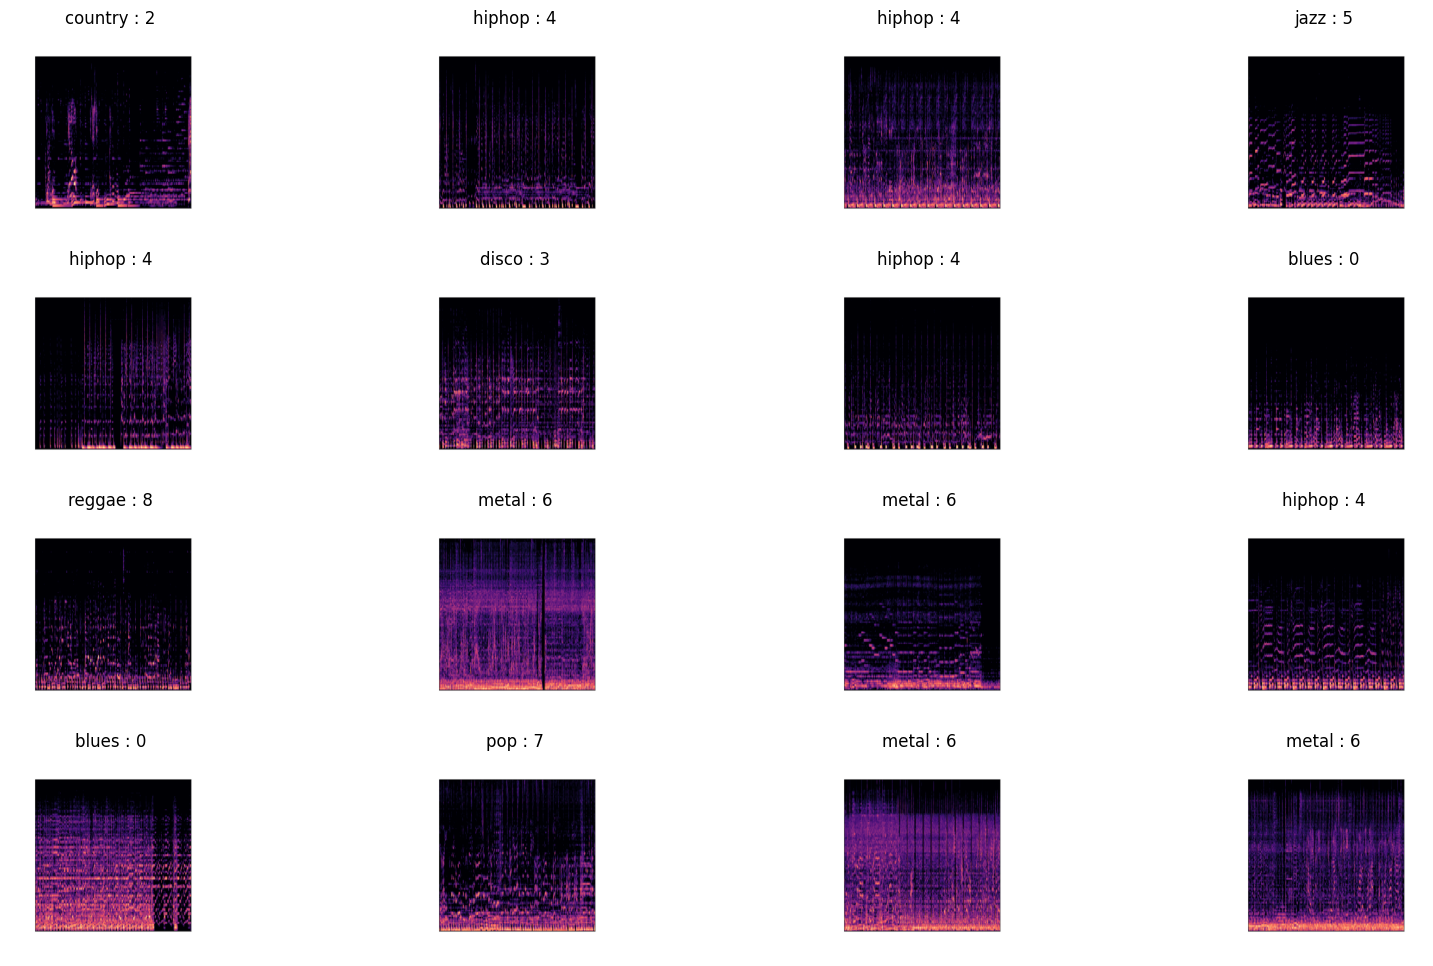

In [53]:
plt.figure(figsize =(20,12))
for image, label in train_dataset.take(1): # taking batch 1 only
    for i in range(16): # 16 means displaying only 16 image from batch
        plt.subplot(4,4, i+1)
        plt.imshow(image[i]/255.0)
        plt.title(CLASS_NAMES[tf.argmax(label[i], axis =0).numpy()] + " : " +  str(tf.argmax(label[i] , axis =0).numpy()))
        plt.axis('off')#Matplotlib function used to turn off the axis lines and labels in a plot.


In [54]:
# train_dataset.map(augment_layer, num_parallel_calls = tf.data.AUTOTUNE) #to the training dataset
training_dataset = train_dataset.prefetch(tf.data.AUTOTUNE) #fetch batches of data in the background while the model is training on the current batch
validation_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)

In [55]:
resize_rescale = tf.keras.Sequential([
    InputLayer(input_shape=(CONFIGURATION['IM_WIDTH'],CONFIGURATION['IM_HEIGHT'],3)),
    Rescaling(1./255.0)])

**MODEL BUILDING**

In [56]:
model = tf.keras.Sequential()
resize_rescale,
model.add(Conv2D(32, (3, 3),
           kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_SIZE']), activation='relu', input_shape=(CONFIGURATION['IM_WIDTH'], CONFIGURATION['IM_HEIGHT'], 3)))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(64, (3, 3),
           kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_SIZE']), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Conv2D(128, (3, 3),
           kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_SIZE']), activation='relu'))
model.add(MaxPool2D((2, 2)))

model.add(Flatten())
model.add(Dense(512,
           kernel_regularizer = L2(CONFIGURATION['REGULARIZATION_SIZE']), activation='relu'))
model.add(Dropout(0.7))
model.add(Dense(10, activation='softmax'))




In [57]:
# model architecture
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 398, 398, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 199, 199, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 197, 197, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 98, 98, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 96, 96, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 48, 48, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 294912)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │   150,995,456 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 151,093,834 (576.38 MB)

 Trainable params: 151,093,834 (576.38 MB)

 Non-trainable params: 0 (0.00 B)

In [58]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [59]:
# history = model.fit(training_dataset,epochs=10,validation_data=validation_dataset)

In [60]:
loss, accuracy = model.evaluate(validation_dataset)

 5/10 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.1365 - loss: 157.4870

I0000 00:00:1709600728.031326     149 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.
W0000 00:00:1709600728.049599     149 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 10s 312ms/step - accuracy: 0.1261 - loss: 159.0602


In [61]:
from tensorflow.keras.callbacks import EarlyStopping

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


In [62]:
from tensorflow.keras.applications import VGG16 # importing pretrained VGG16 architecture
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(400, 400, 3)) # learn this model architecture
# Freeze the convolutional layers, we dont train base model
for layer in base_model.layers:
    layer.trainable = False

# Add your custom dense layers
model1 = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    # Dropout(0.5), we commented this out due to low validation accuracy
    Dense(10, activation='softmax')
])
# model compilation  using best optimizer adam
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [63]:
from tensorflow.keras.callbacks import LearningRateScheduler

# defining schedular
def lr_schedule(epoch):
    initial_learning_rate = 0.001
    decay = 0.9
    lr = initial_learning_rate * decay ** epoch
    return lr

lr_scheduler = LearningRateScheduler(lr_schedule)

# saving data as history
#history_model1 = model1.fit(train_dataset,epochs=50,validation_data=val_dataset) # setting  for easy use while training, holding callback so that we can plot the graph
#callbacks = [early_stopping,lr_schedular]
# this is used incase we have too stop earlier than as included epochs.




**MODEL EVALUATION**

In [64]:
loss, accuracy = model1.evaluate(validation_dataset)

 1/10 ━━━━━━━━━━━━━━━━━━━━ 7:35 51s/step - accuracy: 0.1875 - loss: 7.6299

W0000 00:00:1709600782.457219     149 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


10/10 ━━━━━━━━━━━━━━━━━━━━ 74s 3s/step - accuracy: 0.1344 - loss: 10.1918


W0000 00:00:1709600806.397257     151 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


In [65]:
# # plotting loss of the model
# index = np.arange(50)
# plt.plot(index, history_model1.history['loss'],label ="model loss")
# plt.plot(index,history_model1.history['val_loss'],label = 'validation loss')
# plt.xlabel("epochs")
# plt.ylabel("Loss")
# plt.legend(['train_loss','val_loss'])
# plt.savefig("loss.jpg")
# plt.show()

In [66]:
 # model architecture
 model1.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)              │ (None, 12, 12, 512)    │    14,714,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 73728)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 512)            │    37,749,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         5,130 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 52,469,066 (200.15 MB)

 Trainable params: 37,754,378 (144.02 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [67]:
# index = np.arange(50)
# plt.plot(index, history_model1.history['accuracy'],label ="model accuracy")
# plt.plot(index,history_model1.history['val_accuracy'],label = 'validation accuracy')

# plt.xlabel("epochs")
# plt.ylabel("accuracy")
# plt.legend(['train_accuracy','val_accuracy'])
# plt.savefig("accuracy")
# plt.show()

In [68]:
from tensorflow.keras.applications import VGG19
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(400, 400, 3)) # learn this model architecture
# Freeze the convolutional layers
for layer in base_model.layers:
    layer.trainable = False

# Add your custom dense layers
model3 = tf.keras.Sequential([
    base_model,
    Flatten(),
    Dense(512, activation='relu'),
    # Dropout(0.5),
    Dense(10, activation='softmax')
])

model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


80134624/80134624 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [69]:
# history = model3.fit(train_dataset,epochs=10,validation_data=val_dataset)

**model export**

In [70]:
# import pickle
# pickle_out = open('CNN_model.pickle','wb')
# pickle.dump(model1, pickle_out)
# pickle_out.close()

# #  Hierarchical Data Format version 5 (HDF5) format, generally for tensorflow model
# model1.save("model1.h5")

In [71]:
example1 = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/blues/blues00005.png"
example2 = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/rock/rock00005.png"
example3 = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/blues/blues00005.png"
example4 = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/blues/blues.00005.wav"
example5 = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/hiphop/hiphop00006.png"


**Predicting System**

In [72]:
import librosa.display


def generate_spectrogram(audio_file):
    """
    Generate spectrogram from an audio file.

    Parameters:
        audio_file (str): Path to the audio file.

    Returns:
        plt.Figure: Spectrogram plot.
    """
    # Load audio file
    y, sr = librosa.load(audio_file, sr=None)

    # Compute spectrogram
    hop_length = 512
    n_fft = 2048
    spectrogram = librosa.stft(y, n_fft=n_fft, hop_length=hop_length)

    # Calculate magnitude spectrum
    magnitude_spectrogram = np.abs(spectrogram)

    # Convert to decibels (log scale)
    spectrogram_db = librosa.amplitude_to_db(magnitude_spectrogram, ref=np.min)

    # Create figure and axes objects
    fig, ax = plt.subplots(figsize=(432/100, 228/100), dpi=100)

    # Plot spectrogram
    librosa.display.specshow(spectrogram_db, sr=sr, hop_length=hop_length, x_axis='time', y_axis='chroma',ax=ax)
    # Remove x-axis label
    ax.set_xlabel('')

    # Remove y-axis label
    ax.set_ylabel('')
    # Remove x-axis ticks
    ax.set_xticks([])

    # Remove y-axis ticks
    ax.set_yticks([])
    
    # Add white space around the plot
    fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.05)

    return fig


****.wav to picture conversion****

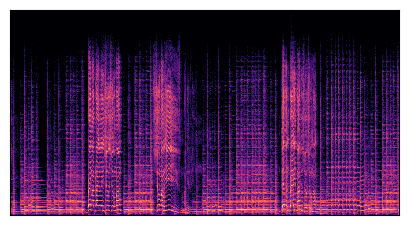

In [73]:
# Example usage:
# 
spectrogram_plot = generate_spectrogram(example4)

# Now, `spectrogram_plot` contains the figure object representing the spectrogram plot.

In [74]:
# preparing predicting system
from tensorflow.keras.preprocessing import image
import cv2

from matplotlib.backends.backend_agg import FigureCanvasAgg as FigureCanvas

# Convert Matplotlib figure to image array
def fig_to_image_array(fig):
    """
    Convert Matplotlib figure to image array.

    Parameters:
        fig (matplotlib.figure.Figure): Matplotlib figure object.

    Returns:
        numpy.ndarray: Image array.
    """
    # Create a canvas to render the figure
    canvas = FigureCanvas(fig)
    canvas.draw()

    # Convert the figure to a NumPy array
    image_array = np.array(canvas.renderer.buffer_rgba())

    # Convert RGBA to RGB
    image_array = cv2.cvtColor(image_array[:, :, :3], cv2.COLOR_RGBA2RGB)

    return image_array


In [75]:
# reshaping the image obtained from the conversion of matplotlib fig to image array
def reshape_image_array(image_array):
    """
    Reshape the image array to the desired shape.

    Parameters:
        image_array (numpy.ndarray): Input image array of shape (400, 1000, 3).

    Returns:
        numpy.ndarray: Reshaped image array of shape (1, 400, 400, 3).
    """
    # Resize width to 400 while maintaining aspect ratio
    resized_image = cv2.resize(image_array, (400, int(400 * image_array.shape[1] / image_array.shape[0])))

    # Crop height to 400
    cropped_image = resized_image[:400, :]

    # Add batch dimension
    reshaped_image_array = np.expand_dims(cropped_image, axis=0)

    return reshaped_image_array



Reshaped Image Array Shape: (1, 400, 400, 3)


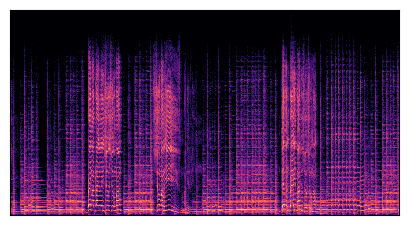

In [76]:
# Example usage:
# Assuming 'image_array' is the input image array of shape (400, 1000, 3)
image_array =fig_to_image_array(generate_spectrogram(example4))
preprocessed_image = reshape_image_array(image_array)

#visualizing
print("Reshaped Image Array Shape:", preprocessed_image.shape)  # Output: (1, 400, 400, 3)


**When the image is selected directly from the directory as country.png**

In [77]:
# preprocessing the input to the model from image_path . selecting the png image of spectrogram , this function is used to preprocess
def preprocess_image(image_path):
    

  # original image
    image = cv2.imread(image_path)

  # resizing image
    new_size = (400, 400)
    resized_image = cv2.resize(image, new_size)

  # converting into array and expanding dimensions
    img_array = np.expand_dims(resized_image, axis=0)
    return img_array

In [78]:
#visualizing the shape of the preprocessed image.
print(preprocess_image(example3))

[[[[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  ...

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]

  [[255 255 255]
   [255 255 255]
   [255 255 255]
   ...
   [255 255 255]
   [255 255 255]
   [255 255 255]]]]


In [79]:
# predicting from wav files
pred = model1.predict(preprocessed_image)
predicted_label = np.argmax(pred)
predicted_class = CLASS_NAMES[predicted_label]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 9s 9s/step
Predicted class: country


In [80]:
predicted_label = np.argmax(pred)
predicted_class = CLASS_NAMES[predicted_label]
print("Predicted class:", predicted_class)

Predicted class: country


In [81]:
predictions = model1.predict(preprocess_image(example3))

# it gives value of predictiion
predicted_label = np.argmax(predictions)

#map class names
predicted_class = CLASS_NAMES[predicted_label]

# observe the result
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Predicted class: jazz


In [82]:
# prediction using first model
# predictions = model.predict(preprocess_image(example3))
# predicted_label = np.argmax(predictions)
# predicted_class = CLASS_NAMES[predicted_label]
# print("Predicted class:", predicted_class)
# succsessfully classify the image used in the traininig section.

In [83]:
predictions = model3.predict(preprocess_image(example3))
predicted_label = np.argmax(predictions)
predicted_class = CLASS_NAMES[predicted_label]
print("Predicted class:", predicted_class)

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
Predicted class: hiphop


In [84]:
temp = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/images_original/country/country00009.png"

In [85]:
def predict_fn(audio_file):
    
    spec_to_fig = generate_spectrogram(audio_file)
    fig_to_array = fig_to_image_array(spec_to_fig)
    resized_array = reshape_image_array(fig_to_array)
    return resized_array
        
        
        

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step
Predicted class: country


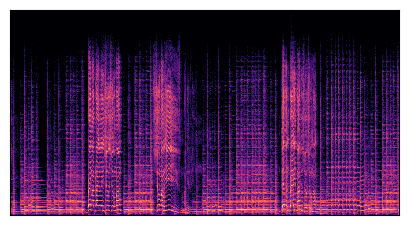

In [86]:
pred1 = model1.predict(predict_fn(example4))
pred_label = np.argmax(pred1)
pred_class = CLASS_NAMES[pred_label]
print("Predicted class:", pred_class)


In [87]:
#installing lime
!pip install lime

In [88]:
# impporting lime
import lime
from lime import lime_image
from skimage.segmentation import mark_boundaries

In [89]:
explainer = lime_image.LimeImageExplainer()
from keras.applications.vgg16 import preprocess_input, decode_predictions


In [90]:
def preprocess_image(image_path):
  image = cv2.imread(image_path) # original image

  # defining new  image size(target image size)
  new_size = (400, 400)

  resized_image = cv2.resize(image, new_size)

  # converting into array and expanding dimensions
  img_array = np.expand_dims(resized_image, axis=0)
  #preprocess means normalizing the pixel value before fetching into the model
  return preprocess_input(img_array)

In [91]:
preprocessed_image = preprocess_image(example3)

In [102]:
#
explanation = explainer.explain_instance(preprocessed_image[0], model1.predict, top_labels=5, hide_color=0, num_samples=10)

  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step


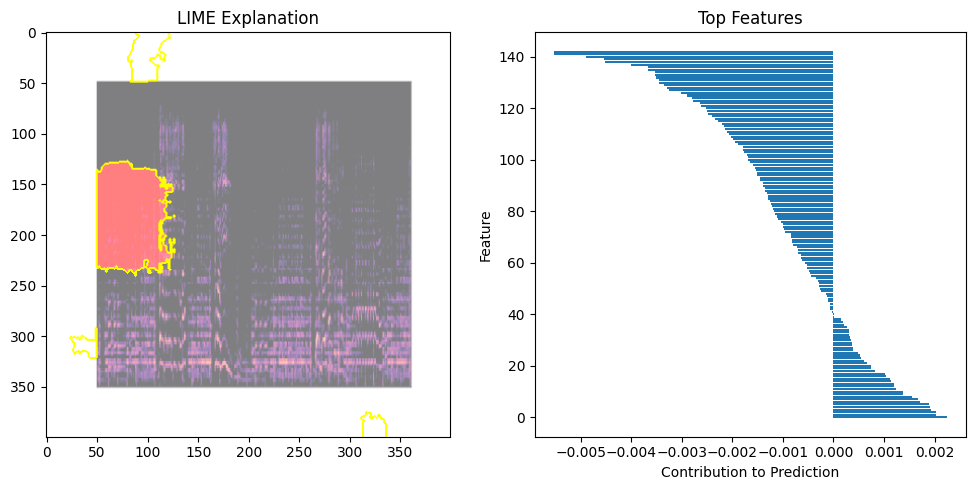

In [100]:
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=False, num_features=5, hide_rest=False)
# Plot the original image with marked boundaries
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.title('LIME Explanation')

# Get the top features contributing to the prediction
top_features = explanation.local_exp[explanation.top_labels[0]]
top_features.sort(key=lambda x: x[1], reverse=True)  # Sort features by importance

# Display the top features and their weights
plt.subplot(1, 2, 2)
plt.barh(range(len(top_features)), [f[1] for f in top_features], align='center')
#plt.yticks(range(len(top_features)), [f[0] for f in top_features])
plt.xlabel('Contribution to Prediction')
plt.ylabel('Feature')
plt.title('Top Features')
plt.tight_layout()
plt.savefig("LIME_3")
plt.show()

(400, 400, 4)
(400, 400, 3)


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


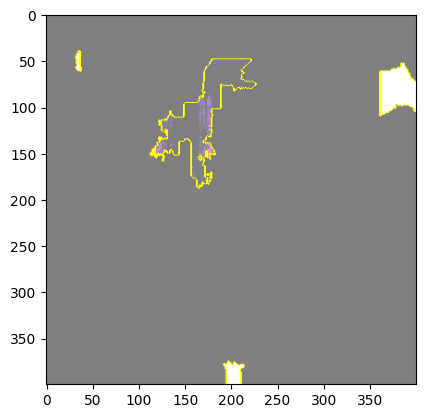

In [99]:
# Install PIL package
from PIL import Image

# Define a function to load and preprocess the image
def load_and_preprocess_image(image_path):
    image = Image.open(image_path)
    image = image.resize((400, 400))  # Resize to match model's expected input size
    image = np.array(image) / 255.0  # Normalize pixel values to [0, 1]
    return image

# Define a function to predict using model1
def predict_function(images):
    # This function should take a batch of images as input and return the model's predictions
    # Replace this with your actual prediction function
    predictions = model1.predict(images)
    return predictions

# Load and preprocess the image
image_path = example3  #  image path
image = load_and_preprocess_image(image_path)
print(image.shape)

# making size(400,400,3)
image = image[:, :, :3]
print(image.shape)

# Initialize the LimeImageExplainer
explainer = lime_image.LimeImageExplainer()

# Generate explanations
explanation = explainer.explain_instance(image, predict_function, top_labels=5, hide_color=0, num_samples=10)

# Visualize the explanations
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=True)
plt.imshow(mark_boundaries(temp / 2 + 0.5, mask))
plt.savefig("LIME_1.jpg")
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 695ms/step
[[6.4174201e-05 3.5533205e-06 2.7040815e-01 2.4167074e-01 7.3103926e-08
  3.5671958e-01 1.3112924e-01 1.5118276e-07 1.2093218e-08 4.2582383e-06]]
0
blues


  0%|          | 0/10 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 636ms/step


W0000 00:00:1709600913.064585     151 graph_launch.cc:671] Fallback to op-by-op mode because memset node breaks graph update


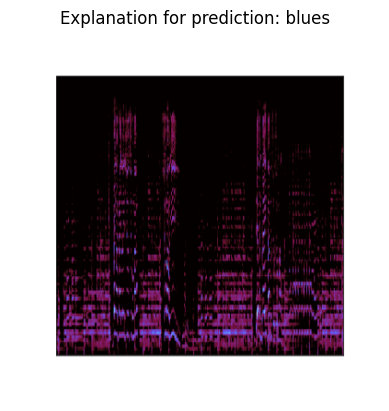

In [95]:

from keras.applications import imagenet_utils
from keras.preprocessing import image
import cv2
import numpy as np

# Load your model


# Function to preprocess image for the model
def preprocess_image(image_path):
    img = image.load_img(image_path, target_size=(400, 400))
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = imagenet_utils.preprocess_input(img)
    return img

# Function to resize image to the required size
def resize_image(image_path):
    img = cv2.imread(image_path)
    img_resized = cv2.resize(img, (400, 400))
    return img_resized

# Path to your image
image_path = example3

# Resize the image
resized_image = resize_image(image_path)

# Preprocess the resized image
preprocessed_image = preprocess_image(image_path)

# Get the class prediction from the model
preds = model1.predict(preprocessed_image)
print(preds)
pred_label = np.argmax(preds[0][0])
print(pred_label)
pred_class = CLASS_NAMES[pred_label]
print(pred_class)

# Create LimeImageExplainer
explainer = lime_image.LimeImageExplainer()

# Explain the model's predictions using LIME
explanation = explainer.explain_instance(resized_image, model1.predict, top_labels=5, hide_color=0, num_samples=10)

# Display the explanation
temp, mask = explanation.get_image_and_mask(explanation.top_labels[0], positive_only=True, num_features=5, hide_rest=False)
plt.imshow(temp)
plt.title('Explanation for prediction: {}'.format(pred_class))
plt.axis('off')
plt.savefig("Lime_2.jpg")
plt.show()


In [96]:
!pip install shap

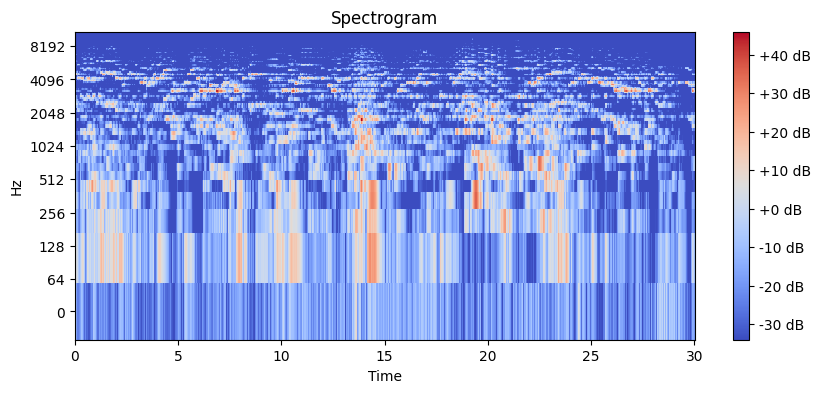

In [97]:
audio_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/classical/classical.00000.wav"  # Replace 'your_audio_file.mp3' with your audio file path
y, sr = librosa.load(audio_path)

# Compute the spectrogram
D = librosa.feature.melspectrogram(y=y,sr = sr, n_fft = 2048, hop_length = 512, n_mels = 100)

D_db = librosa.amplitude_to_db(abs(D))
# Convert amplitude to dB (logarithmic) scale
#D_db = librosa.power_to_db(D,ref=np.max)


# Display the spectrogram
plt.figure(figsize=(10, 4))
librosa.display.specshow(D_db, sr=sr, x_axis='time', y_axis='log')
plt.colorbar(format='%+2.0f dB')
plt.title('Spectrogram')
plt.show()

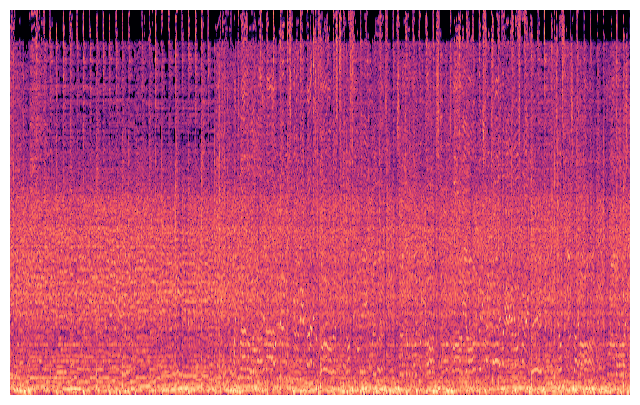

In [98]:
import os
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Path to the directory containing audio files
audio_path = "/kaggle/input/gtzan-dataset-music-genre-classification/Data/genres_original/metal/metal.00000.wav"

# Function to convert audio to Mel spectrogram and save as image

# Load the audio file
y, sr = librosa.load(audio_path)

spectrogram = np.abs(librosa.stft(y=y,  n_fft =  1024, hop_length = 520, window="hann",win_length = 512)) **2
# Compute the Mel spectrogram

S = librosa.feature.melspectrogram(y=y, sr = 22050, n_fft = 2048, hop_length = 512, n_mels = 50000)

# Convert power to dB scale
S_db = librosa.power_to_db(S, ref=np.max)
d_db = librosa.power_to_db(spectrogram, ref=np.max)



# Plot and save the Mel spectrogram as an image
plt.figure(figsize=(8, 5))
librosa.display.specshow(d_db, sr=sr, x_axis='time', y_axis='mel')

plt.axis('off')  # Turn off axis
plt.show()

